## Question 1.

* Expected number of hashes:
    * $h =\sim 2^{k-1}$
* Cost of completing $P$:
    * $\sim m \cdot 2^{k-1}$

In [ ]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

def cost(m, k):
    cases = m * np.power(2, k - 1)
    return cases

def cost(m, k):
    cases = m * np.power(2, k - 1)
    return cases

df_2 = pd.DataFrame.from_dict(dict(case_2))

case_2 = [
    ('# Hashes', [x for x in range(1, 17)]),
    ('Case 2', [0, 0, 0, 1, 4, 10, 20, 31, 40, 44, 40, 31, 20, 10, 4, 1])
]

df_2 = pd.DataFrame.from_dict(dict(case_2))

data = [
    ('Case 1', [1] * 16),
    ('Case 2', [0, 0, 0, 1, 4, 10, 20, 31, 40, 44, 40, 31, 20, 10, 4, 1]),
    ('Case 3', [cost(x, 6) for x in range(1, 17)])
]

df_1 = pd.DataFrame.from_dict(dict(data))

print(df_2.T)

plt.figure()
df_2.plot(kind='scatter', title='Hashes vs. Cases', x='# Hashes', y='Case 2')

plt.figure()
df_2.plot(kind='line', title='Hashes vs. Cases', x='# Hashes', y='Case 2')

plt.figure()
df_2['Case 2'].plot(kind='box', title='Case 2 Distribution')
plt.figure()
df_2['Case 2'].hist(bins=16)

plt.show()
print(df_2['Case 2'].describe())
print('median: ' + str(df_2['Case 2'].median()))


## Question 2.

* Original

* Original

```pseudocode
permit = CheckAccess()

IF (permit == Access_Denied)
    Print "Access Denied"
ELSE 
    Print "Access Granted"
    Run Function()
```

* "Default deny, not default allow!

```pseudocode
permit = CheckAccess()
IF (permit == Access_Granted)
    Print "Access Granted"
    Run Function()
ELSE
    Print "Access Denied"
```

### Question 3.   
<br>

<font color=blue>
    Consider that the <em>incidence</em> of viral attachments in email messages is <b>1 in 800</b>. Your malware checker will correctly identify a message as <em>viral</em> <b>95%</b> of the time. Your malware checker will correctly identify a message <em>non-viral</em> <b>95%</b> of the time. Your malware checker has just flagged a message as being <em>malware</em>. What is the probability that the message is <b>actually okay</b>? Justify your answer using <b>Bayes theorem</b>
</font>

$$
\begin{align*}
& P
\end{align*}
$$

### Question 4.  
<br>

<font color=blue>
    Describe, in your own words, a <b>specific instance of an insider placing malware within a system.</b> You should describe the <b>type of malware placed</b>, <b>the expected likely impact</b>, and <b>some details regarding the outcome</b>. This is not meaning a hypothetical scenario you have made up, find an actual real world example.
</font>



#### References:  

[x]  K. Zetter, "How Digital Detectives Deciphered Stuxnet, The Most Menacing Malware in History," *wired.com,* Jul. 07, 2011. [Online] Available: https://www.wired.com/2011/07/how-digital-detectives-deciphered-stuxnet/ [Accessed: Sep. 21, 2018].  

> Months earlier, in June 2009, someone had silently unleashed a sophisticated and destructive digital worm that had been slithering its way through computers in Iran with just one aim - to sabotage the country's uranium enrichment program and prevent President Mahmoud Ahmadinejad from building a nuclear weapon.

> Ulasen's research team got hold of the virus infecting their client's computer and realized it was using a 'zero -day' exploit to spread. Zero-days are the hacking world's most potent weapons: They exploit vulnerabilities in software that are yet unknown to the software maker or antivirus vendors.

> The vulnerability was in the LNK file of Windows Explorer, a fundamental component of Microsoft Windows. When an infected USB stick was inserted into a computer, as Explorer automatically scanned the contents of the stick, the exploit code awakened and surreptitiously dropped a large, partially encrypted file onto the computer, like a military transport plane dropping camouflaged soldiers into target territory.

> It turned out the code had been launched into the wild as early as a year before, in June 2009, and its mysterious creator had updated and refined it over time, releasing three different versions. Notably, one of the virus's driver files used a valid signed certificate stolen from RealTek Semiconductor, a hardware maker in Taiwan, in order to fool systems into thinking the malware was a trusted program from RealTek. 

> But another Stuxnet driver was found using a second certificate, this one stolen from JMicron Technology, a circuit maker in Taiwan that was — coincidentally or not – headquartered in the same business park as RealTek.

> Experts determined that the virus was designed to target Simatic WinCC Step7 software, an industrial control system made by the German conglomerate Siemens that was used to program controllers that drive motors, valves and switches in everything from food factories and automobile assembly lines to gas pipelines and water treatment plants.

> Experts determined that the virus was designed to target Simatic WinCC Step7 software, an industrial control system made by the German conglomerate Siemens that was used to program controllers that drive motors, valves and switches in everything from food factories and automobile assembly lines to gas pipelines and water treatment plants.

> Several layers of masking obscured the zero-day exploit inside, requiring work to reach it, and the malware was huge — 500k bytes, as opposed to the usual 10k to 15k. Generally malware this large contained a space-hogging image file, such as a fake online banking page that popped up on infected computers to trick users into revealing their banking login credentials. But there was no image in Stuxnet, and no extraneous fat either. The code appeared to be a dense and efficient orchestra of data and commands.

> It contained multiple components, all compartmentalized into different locations to make it easy to swap out functions and modify the malware as needed.

> What most stood out, though, was the way the malware hid those functions. Normally, Windows functions are loaded as needed from a DLL file stored on the hard drive. Doing the same with malicious files, however, would be a giveaway to antivirus software. Instead, Stuxnet stored its decrypted malicious DLL file only in memory as a kind of virtual file with a specially crafted name.

> It then reprogrammed the Windows API — the interface between the operating system and the programs that run on top of it — so that every time a program tried to load a function from a library with that specially crafted name, it would pull it from memory instead of the hard drive. Stuxnet was essentially creating an entirely new breed of ghost file that would not be stored on the hard drive at all, and hence would be almost impossible to find.

> They determined that each time Stuxnet infected a system, it “phoned home” to one of two domains — www.mypremierfutbol.com and www.todaysfutbol.com hosted on servers in Malaysia and Denmark — to report information about the infected machines. This included the machine’s internal and external IP addresses, the computer name, its operating system and version and whether Siemens Simatic WinCC Step7 software, also known simply as Step7, was installed on the machine. The command-and-control servers let the attackers update Stuxnet on infected machines with new functionality or even install more malicious files on systems.

> As Chien and O'Murchu mapped the geographical location of the infections, a strange pattern emerged. Out of the initial 38,000 infections, about 22,000 were in Iran. Indonesia was a distant second, with about 6,700 infections,
followed by India with about 3,700 infections. The United States had fewer than 400. Only a small number of machines had Siemens Step 7 software installed – just 217 machines reporting in from Iran and 16 in the United States.

> Stuxnet exploited a print spooler vulnerability in Windows computers to spread across machines that used a shared printer. The third and fourth exploits attacked vulnerabilities in a Windows keyboard file and Task Scheduler file to escalate the attackers’ privileges on a machine and give them full control of it. Additionally, Stuxnet exploited a static password that Siemens had hard-coded into its Step7 software. Stuxnet used the password to gain access to and infect a server hosting a database used with Step7 and from there infect other machines connected to the server.

> Unlike most malware that used e-mail or malicious websites to infect masses of victims at once, none of Stuxnet’s exploits leveraged the internet; they all spread via local area networks. There was one primary way Stuxnet would spread from one facility to another, and that was on an infected USB thumb drive smuggled into the facility in someone’s pocket.

> The Symantec researchers discovered that every sample of the worm contained the domain name and time stamp of every system it infected. This allowed them to trace every infection back to the original infected computer from which it started. They discovered that the attackers had focused their attack on computers at five organizations in Iran that they believed would be gateways to the target they were seeking. The five organizations were hit repeatedly in separate
infections in June and July 2009 and again in March, April and May 2010. But due to the zero-day exploits in it, Stuxnet spread beyond these organizations, leaving a constellation of infections in its wake.

> Falliere determined that Stuxnet had three main parts and 15 components, all wrapped together in layers of encryption like Russian nesting dolls. Stuxnet decrypted and extracted each component as needed, depending on the conditions it found on an infected machine.

> In addition to these, Stuxnet also had an extensive configuration file – mdmcpq3.pnf — with a menu of more than 400 items the attackers could tweak to control every aspect of the code, such as how long it should spread, and how long each exploit should work. It was here the researchers found an end-date — June 24, 2012.

> If Stuxnet determined that an infected system had Siemens Step7 software installed, the malware decrypted and loaded a DLL file — a library of functions — onto the machine. This DLL impersonated a legitimate DLL file — s7otbxdx.dll — that served as a common Step7 has a nice, Windows-based interface for programming and monitoring a device called a Programmable Logic Controller. PLCs are essentially small computers, generally the size of a toaster, that control everything from motors in packaging assembly lines to critical valves in gas pipelines. To communicate with and program a PLC, plant workers plug their Step7 Windows machines into the PLC and send commands to it or receive data reports.

> This is where Stuxnet’s malicious DLL file came in. Falliere discovered that it would intercept commands going from the Step7 software to the PLC and replace them with its own malicious commands.

> At the same time, another portion of Stuxnet disabled any automated alarms that might go off in the system as a result of the malicious commands. It also masked what was happening on the PLC by intercepting status reports sent
from the PLC to the Step7 machine, and stripping out any sign of the malicious commands. Workers monitoring the PLC from the Step7 machine would then see only legitimate commands on the device...

> ... fact that Stuxnet was injecting commands into the PLC and masking that it was doing so was evidence that it was designed, not for espionage as everyone had believed, but for physical sabotage. The researchers were stunned. It was the first time anyone had seen digital code in the wild being used to physically destroy something in the real world.

> Falliere had reverse-engineered the code that Stuxnet was injecting into the PLC and knew the malware was resetting the value of something connected to the device, but he had no idea what was on the receiving end of these commands or what the changed values would do.

> Frequency converters modulate the speed of motors and rotors in things like high-speed drills that are used to cut metal parts in factories and in paper mills to force pulp through a grate. Increase the frequency of the drive, and
the rotor increases its spin. In the Profibus documentation the researchers found online, they discovered a list of commands to control frequencies; they matched exactly the commands that were written in Stuxnet.

> ... malware would sit quietly on the system doing reconnaissance for about two weeks, then launch its attack swiftly and quietly, increasing the frequency of the converters to 1,410Hz for 15 minutes, before restoring them to a normal frequency of 1,064Hz. The frequency would remain at this level for 27 days, before Stuxnet would kick in again and drop the frequency down to 2Hz for 50 minutes.


[x]  J. Shearer, "W32.Stuxnet Writeup," *Symantec Enterprise,* Security Center, Sep. 26, 2017. [Online]. Available: https://www.symantec.com/security-center/writeup/2010-071400-3123-99 [Accessed: Sep. 21, 2018].  

> W32.Stuxnet was first categorized in July of 2010.

> Incredibly, Stuxnet exploits four zero-day vulnerabilities, which is unprecedented.

> Stuxnet was the first piece of malware to exploit the Microsoft Windows Shortcut 'LNK/PIF' Files Automatic File Execution Vulnerability (BID 41732) in order to spread. The worm drops a copy of itself as well as a link to that copy on a removable drive. When a removable drive is attached to a system and browsed with an application that can display icons, such as Windows Explorer, the link file runs the copy of the worm. Due to a design flaw in Windows, applications that can display icons can also inadvertently run code, and in Stuxnet’s case, code in the .lnk file points to a copy of the worm on the same removable drive.

> Furthermore, Stuxnet also exploits the Microsoft Windows Server Service RPC Handling Remote Code Execution Vulnerability (BID 31874), which was notably used incredibly successfully by W32.Downadup (a.k.a Conficker), as well as the Microsoft Windows Print Spooler Service Remote Code Execution Vulnerability (BID 43073).

> The worm also attempts to spread by copying itself to network shares protected by weak passwords.

> ... it firstly uses two different and most importantly legitimate certificates signed by wellknown companies to avoid detection by antivirus applications. Once it finds its way onto a computer and exploits the .lnk vulnerability to run, it then installs a rootkit in order to hide itself on the system.

> Stuxnet searches for industrial control systems, often generically (but incorrectly) known as SCADA systems, and if it finds these systems on the compromised computer, it attempts to steal code and design projects. It may also take advantage of the programming software interface to also upload its own code to the Programmable Logic Controllers (PLC), which are ‘mini-computers’, in an industrial control system that is typically monitored by SCADA systems. Stuxnet then hides this code, so when a programmer using a compromised computer tries to view all of the code on a PLC, they will not see the code injected by Stuxnet.

> Thus, Stuxnet isn’t just a rootkit that hides itself on Windows, but is the first publicly known rootkit that is able
to hide injected code located on a PLC.

> 2.1 Remotely exploitable vulnerabilities: Stuxnet was the first worm to exploit the Microsoft Windows Shortcut 'LNK/PIF' Files Automatic File Execution Vulnerability (BID 41732) in order to spread; in fact when Stuxnet was first discovered, this vulnerability was an unknown, or zero-day, vulnerability and it wasn’t until Stuxnet was analyzed that we discovered this vulnerability... specifically it is a design flaw as Windows is doing exactly what it was designed to do. 

> The worm copies itself to removable drives as the following files: %DriveLetter%\~WTR4132.tmp; %DriveLetter%\~WTR4141.tmp. Note: Both file names are hardcoded and they are actually .dll files.


> It also copies the following files to the above drives: %DriveLetter%\Copy of Shortcut to.lnk; %DriveLetter%\Copy of Copy of Shortcut to.lnk; %DriveLetter%\Copy of Copy of Copy of Shortcut to.lnk; %DriveLetter%\Copy of Copy of Copy of Copy of Shortcut to.lnk

> When the drive is accessed by an application that can display icons, such as Windows Explorer, instead of displaying the icon for the .lnk files, it runs code that executes the file %DriveLetter%\~WTR4132.tmp. This file’s main purpose is to execute the other file that is copied to the removable drive, DriveLetter%\~WTR4141.tmp, which is then loaded into memory. Its worth noting that this file has a valid signature issued to and signed by well-known companies.

> It also uses a remote procedure call (RPC) exploit to spread. This exploit is only effective against computers that have not applied the patch for the Microsoft Windows Server Service RPC Handling Remote Code Execution Vulnerability (BID 31874).

> ... exploits the Microsoft Windows Print Spooler Service Remote Code Execution Vulnerability (BID 43073) to copy itself from one compromised computer to another. The vulnerability allows for a file to be written to the %System% directory of a vulnerable computer. Stuxnet first uses this vulnerability to plant a copy of itself on a vulnerable machine and later it uses a feature of WBEM to achieve execution of that file on the remote computer.

> 2.2 Network Shares: Stuxnet also attempts to spread via network shares by copying itself to network shares as the following file: %DriveLetter%\ “DEFRAG[RANDOM NUMBER].tmp. Note: This file is in fact a .dll file. It then attempts to create a job to run the .dll file.

> Downloading: The worm is able to download a payload executable on to the compromised computer from the C&C server
and execute it.

> Uploading: The worm sends an HTTP request to the server containing information about the compromised computer. This information is sent by making a request to the following URL: http://[C&C SERVER ADDRESS]/index.php?data=[DATA]. Note: DATA represents the system information that has been gathered.

> Other network activity
The worm contacts the following URLs through port 80, which are the worm's C&C servers, to test Internet
connectivity: www.mypremierfutbol.com; www.todaysfutbol.com. The data is not sent in plain text though; instead it is encrypted with XOR using a 31-byte key. The data section also contains several fields describing the data. The response received back from the C&C server is also encrypted using XOR but using a different 31-byte key. Both of these keys are contained in the malicious .dll file on the compromised computer and can be used to decipher network traffic to and from the C&C server.

> 3.3 Targetting SCADA software: Stuxnet is specifically targeting systems with supervisory control and data acquisition (SCADA) software installed. The threat performs many database queries on the database used by the Siemens Step 7 software and interacts with the .dll files belonging to that product. It tries to extract specific data from the database. For example, it tries to access files with the following characteristics, created by the Step 7 software:

> Industrial control systems consist of Programmable Logic Controllers (PLCs), which can be thought of as mini-computers that can be programmed from a Windows system. These PLCs contain special code that controls the automation of industrial processes.

> Stuxnet has the ability to take advantage of the programming software to also upload its own code to the PLC in an industrial control system that is typically monitored by SCADA systems. In addition, Stuxnet then hides these code blocks, so when a programmer using an infected machine tries to view all of the code blocks on a PLC, they will not see the code injected by Stuxnet. Thus, Stuxnet isn’t just a rootkit that hides itself on Windows, but is the first publicly known rootkit that is able to hide injected code located on a PLC.


[x]  D. Kushner, "The Real Story of Stuxnet," *IEEE Spectrum,* Feb. 26, 2013. [Online]. Available: https://spectrum.ieee.org/telecom/security/the-real-story-of-stuxnet [Accessed: Sep. 21, 2018].  

> Although a computer virus relies on an unwitting victim to install it, a spreads on its own, often over a computer network.

> First, it targeted Microsoft Windows machines and networks, repeatedly replicating itself. Then it sought out Siemens Step7 software, which is also Windows-based and used to program industrial control systems that operate equipment, such as centrifuges. Finally, it compromised the programmable logic controllers. The worm’s authors could thus spy on the industrial systems and even cause the fastspinning centrifuges to tear themselves apart, unbeknownst to the human operators at the plant.

> All that changed in June 2010, when a Belarusian malware-detection firm got a request from a client to determine why its machines were rebooting over and over again. The malware was signed by a digital certificate to make it appear that it had come from a reliable company. This feat caught the attention of the antivirus community, whose automated-detection programs couldn’t handle such a threat. This was the first sighting of Stuxnet in the wild.

> Schouwenberg was most impressed by Stuxnet’s having performed not just one but four zero-day exploits, hacks that take advantage of vulnerabilities previously unknown to the white-hat community. “It’s not just a groundbreaking number; they all complement each other beautifully,” he says. “The LNK [a file shortcut in Microsoft Windows] vulnerability is used to spread via USB sticks. The shared printspooler vulnerability is used to spread in networks with shared printers, which is extremely common in Internet Connection Sharing networks. The other two vulnerabilities have to do with privilege escalation, designed to gain system-level privileges even when computers have been thoroughly locked down. It’s just brilliantly executed.”

> Although Stuxnet may have temporarily slowed the enrichment program in Iran, it did not achieve its end goal. “Whoever spent millions of dollars on Stuxnet, Flame, Duqu, and so on—all that money is sort of wasted. That malware is now out in the public spaces and can be reverse engineered,” says Carr.
 

[x]  R. Naraine, "Stuxnet attackers used 4 Windows zero-day exploits," *zdnet.com*, Sep. 24, 2010. [Online]. Available: https://www.zdnet.com/article/stuxnet-attackers-used-4-windows-zero-day-exploits/ [Accessed: Sep. 21, 2018].  

>... four different zero-day security vulnerabilities to burrow into -- and spread around -- Microsoft's Windows operating system.

> ... initially targeted the old MS08-067 vulnerability (used in the Conficker attack), a new LNK (Windows Shortcut) flaw to launch exploit code on vulnerable WIndows systems and a zero-day bug in the Print Spooler Service that makes it possible for malicious code to be passed to, and then executed on, a remote machine.

> ... worm also used signed digital certificates stolen from RealTek and JMicron and also exploited security problems in the Simatic WinCC SCADA systems.


[x]  J. Fruhlinger, "What is Stuxnet, who created it and how does it work?" *csoonline.com*, Aug. 22, 2017. [Online]. Available: https://www.csoonline.com/article/3218104/malware/what-is-stuxnet-who-created-it-and-how-does-it-work.html [Accessed: Sep. 21, 2018]  

> Stux net was first identified by the infosec community in 2010, but development on it probably began in 2005.

> Despite its unparalleled ability to spread and its widespread infection rate, Stuxnet does little or no harm to computers not involved in uranium enrichment. When it infects a computer, it checks to see if that computer is connected to specific models of programmable logic controllers (PLCs) manufactured by Siemens. PLCs are how computers interact with and control industrial machinery like uranium centrifuges.

> The worm then alters PLCs' programming, resulting in the centrifuges being spun too quickly and for too long, damaging or destroying the delicate equipment in the process.

> While this is happening, the PLCs tell the controller computer that everything is working fine, making it difficult to detect or diagnose what's going wrong until it's too late.


[x]  D. Sanger, "Obama Order Sped Up Wave of Cyberattacks Against Iran," *nytimes.com*, Jun. 1, 2012. [Online]. Available: https://www.nytimes.com/2012/06/01/world/middleeast/obama-ordered-wave-of-cyberattacks-against-iran.html?pagewanted=1&_r=1&hp [Accessed: Sep. 22, 2018].  

> Told it was unclear how much the Iranians knew about the code, and offered
evidence that it was still causing havoc, Mr. Obama decided that the cyberattacks
should proceed. In the following weeks, the Natanz plant was hit by a newer
version of the computer worm, and then another after that. The last of that series
of attacks, a few weeks after Stuxnet was detected around the world, temporarily
took out nearly 1,000 of the 5,000 centrifuges Iran had spinning at the time to
purify uranium.

> These officials gave differing assessments of how successful the sabotage
program was in slowing Iran’s progress toward developing the ability to build
nuclear weapons. Internal Obama administration estimates say the effort was set
back by 18 months to two years, but some experts inside and outside the
government are more skeptical, noting that Iran’s enrichment levels have steadily
recovered, giving the country enough fuel today for five or more weapons, with
additional enrichment.

> ... first stage in the effort was to develop a bit of computer code called a
beacon that could be inserted into the computers, which were made by the
German company Siemens and an Iranian manufacturer, to map their operations.
The idea was to draw the equivalent of an electrical blueprint of the Natanz plant,
to understand how the computers control the giant silvery centrifuges that spin at
tremendous speeds. The connections were complex, and unless every circuit was
understood, efforts to seize control of the centrifuges could fail.

> Eventually the beacon would have to “phone home” — literally send a
message back to the headquarters of the National Security Agency that would
describe the structure and daily rhythms of the enrichment plant. Expectations
for the plan were low; one participant said the goal was simply to “throw a little
sand in the gears” and buy some time.

> An error in the code, they said, had led it to spread to an engineer’s computer
when it was hooked up to the centrifuges. When the engineer left Natanz and
connected the computer to the Internet, the American- and Israeli-made bug
failed to recognize that its environment had changed. It began replicating itself all
around the world. Suddenly, the code was exposed, though its intent would not be
clear, at least to ordinary computer users.

> Within a week, another version of the bug brought down just under 1,000 centrifuges.


[x]   R. Lagner, "Cracking Stuxnet, a 21st-century cyber weapon," *TEDx Talk*, Mar. 2011. [Video file]. Available: https://www.ted.com/talks/ralph_langner_cracking_stuxnet_a_21st_century_cyberweapon. [Accessed: Sep. 22, 2018].


## Question 5.  

In the context of <b>phishing</b>, list <b>8 points</b> that can be used in <b>checking the legitimacy of an email</b>. <b>Justify</b> why each is appropriate as an <b>indicator</b>. Note that some points could relate to characteristics of legitimate messages, and others could be indicators of a phishing message.

In relation to detecting phishing attempts, the following are points to consider when checking the legitimacy of an email:

1. Anti-spam filtering software  

    The use of anti-spam filtering software at the desktop level or at the gateway level (by ISPs and email service providers) is considered 

2. Identifying receiving email address in email header
3. Check any domain and URL link sent in email body for spelling errors
    * Additionally, check the web address of any embedded links
4. Type desired web address into browser instead of clicking on embedded links
5. Confirm the apparent sending institution is a legitimate provider of service
6. Check for any spelling or grammatical errors in the email body content  
7. Call the apparent sending institution to verify authenticity  
8. Do not open any attachments that you are not expecting and especially if it is an executable (.exe suffix)
9. Check the whether the website is using the HTTPS protocol and check the SSL certificate is legitimate


**References:** 

[1]  G. Tally, R. Thomas, & T. Van Vleck, "Anti-Phishing: Best Practices for Institutions and Consumers," *McAfee*, Sep. 2004. [Online]. Available: https://docs.apwg.org/sponsors_technical_papers/Anti-Phishing_Best_Practices_for_Institutions_Consumer0904.pdf [Accessed: Sep, 23, 2018].

[2]  W. Zamora, "Something’s phishy: How to detect phishing attempts," *Malwarebytes Labs*, Jun. 26, 2017. [Online]. Available: https://blog.malwarebytes.com/101/2017/06/somethings-phishy-how-to-detect-phishing-attempts/ [Accessed: Sep. 23, 2018].

[3]  Anti-Phishing Working Group, "How to Avoid Phishing Scams," *Anti-Phishing Working Group*. [Online]. Available: https://apwg.org/resources/overview/avoid-phishing-scams [Accessed: Sep. 23, 2018]

## Question 6.  

### (a)

In [3]:
import pandas as pd
from IPython.display import display

n_x = 1  # number of X infected computers at t = 0

table = {'t': [i for i in range(0, 25)],
         'x': [2 ** j for j in range(0, 25)]}

df_1 = pd.DataFrame(table)
display(df_1)

{0: <State.X_INFECTED: 1>, 1: <State.UNINFECTED: 0>, 2: <State.UNINFECTED: 0>, 3: <State.UNINFECTED: 0>, 4: <State.UNINFECTED: 0>, 5: <State.UNINFECTED: 0>, 6: <State.UNINFECTED: 0>, 7: <State.UNINFECTED: 0>, 8: <State.UNINFECTED: 0>, 9: <State.UNINFECTED: 0>}


### (b)

In [33]:
import numpy as np
from enum import Enum

class State(Enum):
    UNINFECTED = 0
    X_INFECTED = 1
    W_INFECTED = 2

time = 0

n_C = 0  # number of computers
n_X = 0  # number of X infected computers
n_W = 0  # number of W infected computers


# Get the number of computers
n_C = 10

computers = { x : State.UNINFECTED for x in range(n_C) }

random.seed(2)
sample = random.sample(list(computers.keys()), 1)  # set up a random sample with no duplicates
choice = random.choice(sample)  # select one to be infected at the beginning
computers[choice] = State.X_INFECTED

# every hour the worm X spreads from each infected computer 
# to one previously uninfected computer.

for i in np.arange(0, 24.5, 0.5):
    if i is 6.5:  # a counter worm, W has been developed and is deployed on one infected computer
        pass
        

print(computers)

,t,x,w
0,0.0,1,0
1,0.5,1,0
2,1.0,2,0
3,1.5,2,0
4,2.0,4,0
5,2.5,4,0
6,3.0,8,0
7,3.5,8,0
8,4.0,16,0
9,4.5,16,0


### (c)

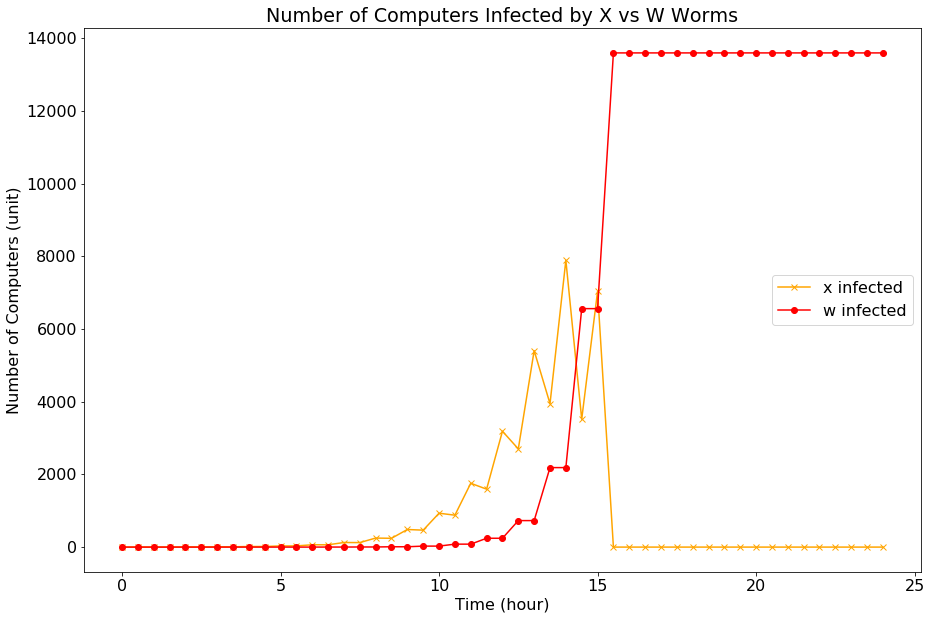

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

<font color=blue>
    Briefly describe, in your own words, each of the following. Be sure to specify the domain and nature of each. 
</font><br>
<font color=blue>&nbsp;&nbsp;&nbsp;&nbsp;a) <b>an XML bomb.</b><br></font>
<font color=blue>&nbsp;&nbsp;&nbsp;&nbsp;b) <b>BlueSmack.</b><br></font>
<font color=blue>&nbsp;&nbsp;&nbsp;&nbsp;c) <b>Mydoom.</b><br></font>
<font color=blue>&nbsp;&nbsp;&nbsp;&nbsp;d) <b>Torpig.</b><br></font>

### (d)

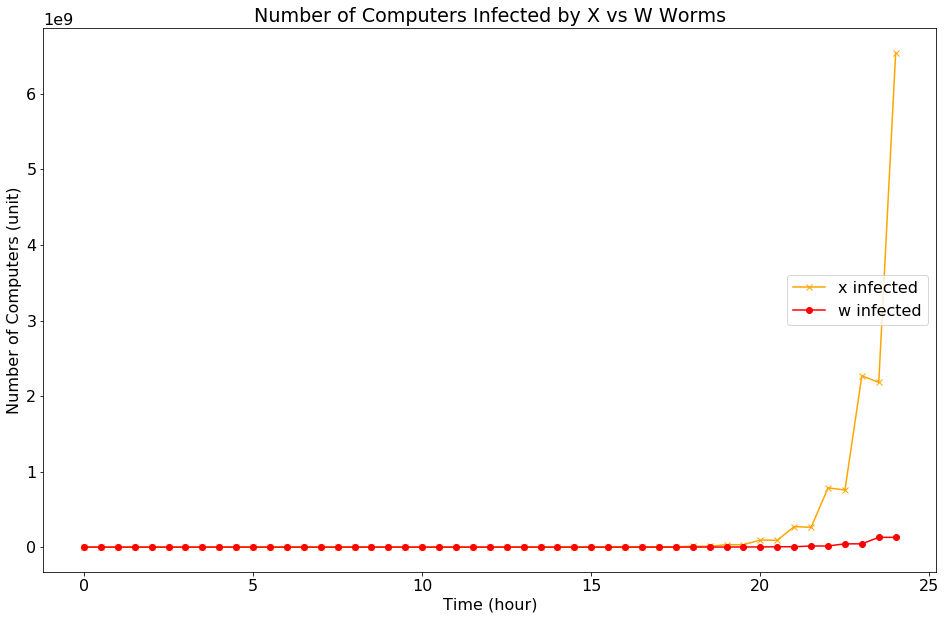

In [35]:
for i in table['t']:
    idx = int(i * 2)

    if i == np.float(0):
        n_x = 1
        table['x_inf'][0] = n_x
    elif i == np.float(0.5):
        table['x_inf'][1] = n_x

    if i >= np.float(1.0):

        if i % 1 == 0:  # on every hour
            n_x *= 2 if i < np.float(9.0) else 3  # at t = 9, x evolves to spread to three uninfected computers each hour
            table['w_inf'][idx] = n_w if i > np.float(6.5) else 0  # maintain w at hour mark
            table['x_inf'][idx] = n_x

        elif i % 1 == 0.5:  # on every half hour
            if i == np.float(6.5):  # at t = 6.5, introduce w
                n_w = 1
                table['w_inf'][idx] = n_w
                n_x = n_x - n_w
                table['x_inf'][idx] = n_x

            if i > np.float(6.5):  # after introduction of w
                n_w *= 3
                if n_w > n_x:
                    n_w = int((n_w / 3) + n_x)

                n_x = int(n_x - (n_w - (n_w / 3))) if n_w < n_x and n_x > 0 else 0
                table['w_inf'][idx] = n_w
            table['x_inf'][idx] = n_x

df_3 = pd.DataFrame(table)
# df_3.columns = ['t', 'x', 'w']
# display(df_3)

df_3.columns = ['t', 'x_inf', 'w_inf']

# plot graph
plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 16})

plt.plot('t', 'x_inf', data=df_3, color='orange', marker='x', label='x infected')
plt.plot('t', 'w_inf', data=df_3, color='red', marker='o', label='w infected')
plt.xlabel("Time (hour)")
plt.ylabel("Number of Computers (unit)")
plt.title("Number of Computers Infected by X vs W Worms")
plt.legend(loc=5)
plt.show()

At t = 9, X has already substantially infected 484 computers and W has only infected 9 computers. After this point, if X now profliferates

## Question 7. 

#### XML Bomb  

A form of Denial-of-Service attack that impacts the availability of a website. XML, eXtensible Markup Language, is a markup language that was designed and is popular for storing and transferring structured data [1]. Data files can be checked by a parsing library before being processed. XML schemas and Document Type Definitions (DTDs) files are used to then validate and compare rules for the type of data that appears in the XML file. Inline DTDs can be abused when the parsing library is not configured properly, causing what is known as an XML bomb or Entity Expansion XML bomb [2]. A famous XML bomb example includes the "Billions Laugh Effect." This type of attack can list entity definitions in an XML file that is heavily nested, leading to parsing that can lead to extremly large files. The large size of these parsed XML files can cause a server to crash.


#### BlueSmack  

A form of Denial-of-Service attack that specifically targets Bluetooth-enabled devices and the Bluetooth protocol. It is a similar technique to the 'Ping of Death' attack of Windows 95, where a l2ping data packet (roughly 600 bytes) is transmitted to a Bluetooth device bigger than the maximum packet size [3], [4]. This causes the device to become unusable, and can also affect the device by draining its battery [4]. The l2ping packet is part of the standard distribution of the BlueZ utility package that ships with Linux [3]. 


#### Mydoom  

Mydoom (aka W32.MyDoom@mm) is a variant of computer worm that was spread via email which affected Microsoft Windows systems discovered in 2004. It infected systems by copying itself to P2P KaZaA client shared directories and its payload contained a backdoor Remote Access component on TCP port 3127 [5]. From here, the worm was able to extract email addresses from the system and then use SMTP methods to send itself as an attachment from the host email server [5]. The original variant of Mydoom is the fastest growing spam email worm known so far and has also been shown to avoid sending itself to certain domain addresses such as Rutgers, MIT, Stanford, UC Berkeley, Microsoft and Symantec [6]. Other variants of the worm were later designed to use infected hosts as zombies in a Distributed Denial-of-Service attack directed at the SCO Group and Microsoft [6]. 


#### Torpig   





**References:**

[1]   w3schools, "Introduction to XML," *w3schools.com*. [Online]. Available: https://www.w3schools.com/xml/xml_whatis.asp [Accessed: Sep. 23, 2018].

[2]   D. Jovanoski, "XML vulnerabilities," May 6, 2013. [Online]. Available: https://resources.infosecinstitute.com/xml-vulnerabilities/ [Accessed: Sep. 23, 2018]. 

[3]   trinite.suff, "BlueSmack," *tifinite.org*. [Online] Available: https://trifinite.org/trifinite_stuff_bluesmack.html [Accessed: Sep. 23, 2018]

[4]   S.P. Oriyano, *Kali Linux Wireless Penetration Testing Cookbook*. Birmingham: Packt Publishing, 2017. 

[5]   McAfee, "Virus Profile: W32/Mydoom@MM," *McAfee*, Jan. 02, 2004. [Online]. Available: https://home.mcafee.com/virusinfo/virusprofile.aspx?key=100983 [Accessed: Sep. 23, 2018].  

[6]   Newsweek Staff, "More Doom?" *Newsweek*, Feb. 2, 2004. [Online]. Available: https://www.newsweek.com/more-doom-131157 [Accessed: Sep. 23, 2018].

[7]   B. Stone-Gross, M. Cova, B. Gilbert, R. Kemmerer, C. Kruegel, and G. Vigna, "Analysis of a Botnet Takeover,' *IEEE Security & Privacy*, vol. 9, no. 1, Jan.-Feb, pp. 64-72, 2010. Available: IEEE Xplore Digital Library, https://ieeexplore.ieee.org/document/5560627/. [Accessed September 23, 2018].

[8]   Carnegie Mellon University, "Torpig," *web.archive.org*, May 19, 2015. [Online]. Available: https://web.archive.org/web/20150519174934/http://www.cmu.edu/iso/aware/be-aware/torpig.html [Accessed: Sep. 23, 2018].

[9]   R. Naraine, "Botnet hijack: Inside the Torpig malware operation," *zdnet.com*, May 4, 2009. [Online] Available: https://www.zdnet.com/article/botnet-hijack-inside-the-torpig-malware-operation/ [Accessed: Sep. 23, 2018].

## Question 8.  

A Browser Helper Object (BHO) is a plugin that is used in Microsoft's Internet Explorer (IE) that added additional functionality, such as a toolbar, to the browsers Document Object Model (DOM) [2]. The objects are commonly DLL, DAT, or EXE files that are installed mistakenly by users or often as part of bundled software. 

It is for its designed and intended purpose that BHOs were used maliciously in an attack commonly called Browser Hijack Objects, which is a form of adware. This attack affects the integrity and availability of the system [1]. In this malicious infection, the plugin that is installed is often used to provide advertisements in a toolbar that can provide financial incentives for the attacker when clicked on. Through the use of BHOs, the attacker can automate the the clicks for financial gain every time a victim uses their browser. 

**References:**

[1]   W. Stallings, *Computer Security: Principles and Practice, Global Edition,  4th Edition*, New York, NY: Pearson, 2018. [VitalSource Bookshelf version]. Available: https://www.vitalsource.com/en-uk/products/computer-security-principles-and-practice-global-william-stallings-v9781292220635. [Accessed: Sep. 23, 2018].


[2]   Malwarebytes Labs, "Browser Hijack Objects (BHOs)," *Malwarebytes Labs*, Jun. 9, 2016. [Online]. Available: https://blog.malwarebytes.com/threats/browser-hijack-objects-bhos/ [Accessed: Sep. 23, 2018]. 